In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

In [4]:
playlist_df=pd.read_csv("FreeCodeCamp-playlist-data.csv")
playlist_df.head()

,Video_ID,Video_Name,Date,View_Count,Like_Count,Comment_Count,Tags
0,t2CEgPsws3U,Data Structures and Algorithms in JavaScript -...,2018-09-04T18:16:17Z,995541,23155,506,"['data structures and algorithms', 'data struc..."
1,iLx4ma8ZqvQ,...spread operator and rest operator - Beau te...,2017-03-22T18:04:50Z,147851,5484,173,"['spread', 'rest', 'operator', 'arrays', 'cond..."
2,r6SnMjsLrBk,"Objects, part 2: Beau teaches JavaScript",2017-03-21T19:12:12Z,16346,255,5,"['tutorial', 'lookups', 'delete', 'remove', 'n..."
3,r7v6EIiHfVA,Logical operators && TRICKS with short-circuit...,2017-03-20T16:44:04Z,67027,1039,38,"['javascript', 'short circuit', 'short-circuit..."
4,bK7I79hcm08,Queues & Priority Queues - Beau teaches JavaSc...,2017-03-19T19:32:07Z,42090,543,27,"['queue', 'dequeue', 'enqueue', 'priority', 'd..."


In [5]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Video_ID       92 non-null     object
 1   Video_Name     92 non-null     object
 2   Date           92 non-null     object
 3   View_Count     92 non-null     int64 
 4   Like_Count     92 non-null     int64 
 5   Comment_Count  92 non-null     int64 
 6   Tags           92 non-null     object
dtypes: int64(3), object(4)
memory usage: 5.2+ KB


In [6]:
playlist_df['Date']=playlist_df['Date'].apply(pd.to_datetime)

In [7]:
playlist_df.dtypes

Video_ID                      object
Video_Name                    object
Date             datetime64[ns, UTC]
View_Count                     int64
Like_Count                     int64
Comment_Count                  int64
Tags                          object
dtype: object

In [8]:
playlist_df.describe()

,View_Count,Like_Count,Comment_Count
count,92.000000,92.000000,92.000000
mean,60725.065217,1190.478261,40.641304
std,105363.892254,2480.734823,57.004835
min,5582.000000,109.000000,1.000000
25%,24252.000000,368.500000,15.000000
50%,40551.000000,656.000000,28.500000
75%,66140.500000,1224.750000,46.000000
max,995541.000000,23155.000000,506.000000


In [9]:
plt.figure(figsize=(6,10))


<Figure size 600x1000 with 0 Axes>

<Figure size 600x1000 with 0 Axes>

In [10]:
playlist_df['Listed_tags']=playlist_df['Tags'].str.replace('[','').str.replace(']','').str.split(',')
tags=playlist_df.explode('Listed_tags')
tags['Listed_tags']=tags['Listed_tags'].apply(lambda x: x.strip())
tags_df=pd.DataFrame(tags.groupby(['Listed_tags'])['Video_ID'].count().sort_values(ascending=False))

tags_df.head()

,Video_ID
Listed_tags,
'javascript',45
'tutorial',29
'es6',11
'jquery',9
'clean code',8


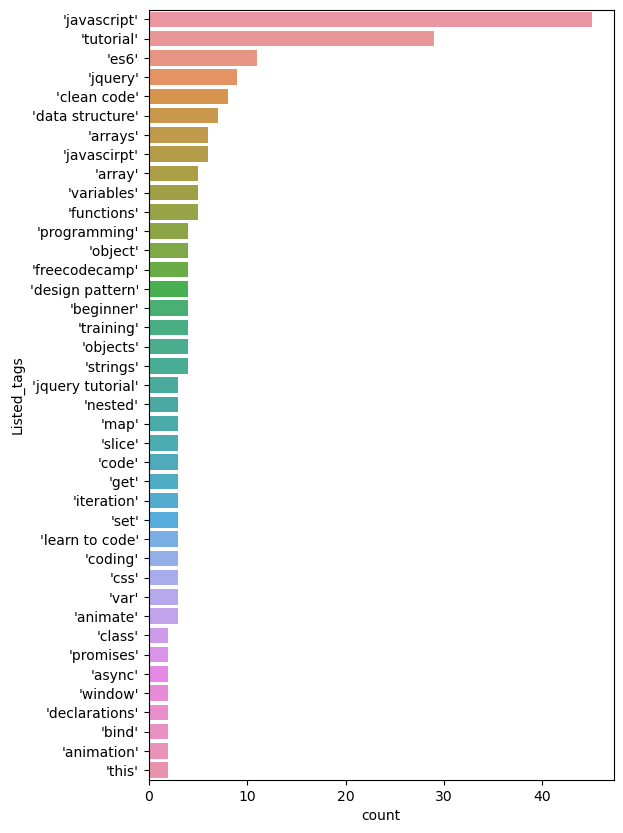

In [11]:
plt.figure(figsize=(6,10))
sns.countplot(data=tags,y='Listed_tags',order=tags['Listed_tags'].value_counts().iloc[:40].index)
plt.show()

<Axes: xlabel='Like_Count', ylabel='View_Count'>

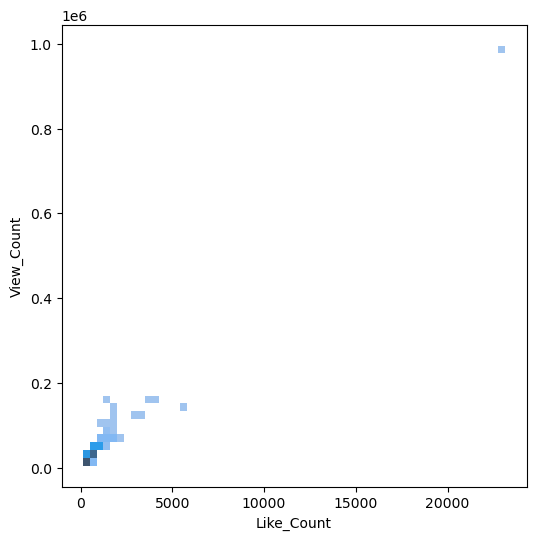

In [41]:
plt.figure(figsize=(6,6))
sns.histplot(data=playlist_df,x='Like_Count',y='View_Count',kde=True)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [43]:
X=playlist_df[['Like_Count','Comment_Count']]
Y=playlist_df['View_Count']
train_x,test_x,train_y,test_y=train_test_split(X,Y,random_state=0)
lr=LinearRegression()


In [44]:
lr.fit(train_x,train_y)

LinearRegression()

In [45]:
predict=lr.predict(test_x)
predict

array([ 22506.73870815,  20199.52828539,  23292.55665635,  46333.13427632,
        75093.4872277 ,  32148.98528131,  38582.62947906,  92121.36911242,
        71421.80589016,  91535.74190726,  31731.80860902,  44582.6575576 ,
        54263.61857952, 100902.07686531,  58901.45311053,  29125.27288565,
        63870.35315231,  83503.84567925,  24557.11006928,  37758.66642391,
        73139.04797575,  33938.17644879,  22298.43504291])

In [46]:
mse=mean_squared_error(test_y,predict)
mse

338263543.20183164